# 데이터 분석 및 전처리

### 데이터 불러오기 및 분석하기
* 데이터 크기
* 데이터의 개수
* 각 리뷰의 문자 길이 분포
* 많이 사용된 단어
* 긍, 부정 데이터의 분포
* 각 리뷰의 단어 개수 분포
* 특수문자 및 대, 소문자 비율

In [1]:
import zipfile

In [2]:
DATA_IN_PATH = './data_in/'

In [3]:
file_list = ['labeledTrainData.tsv.zip', 'unlabeledTrainData.tsv.zip', 'testData.tsv.zip']

for file in file_list:
    zipRef = zipfile.ZipFile(DATA_IN_PATH + file, 'r')
    zipRef.extractall(DATA_IN_PATH)
    zipRef.close()

In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 크기

In [5]:
# quoting : 0(default) : 인용구 관련, '', ""는 읽지 않고 내부값만 출력, 3 : "", ''를 출력
train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, \
                         delimiter = '\t', quoting = 3)
train_data.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [6]:
print("파일 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    if 'tsv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH + file) / 1000000, 2)) + 'MB')

파일 크기 : 
labeledTrainData.tsv          33.56MB
testData.tsv                  32.72MB
unlabeledTrainData.tsv        67.28MB


## 데이터 개수

In [7]:
print('전체 학습데이터의 개수: {}'.format(len(train_data)))

전체 학습데이터의 개수: 25000


## 각 리뷰의 문자 길이 분포

In [8]:
train_length = train_data['review'].apply(len)
train_length

0        2304
1         948
2        2451
3        2247
4        2233
         ... 
24995     582
24996     977
24997     643
24998    1143
24999     944
Name: review, Length: 25000, dtype: int64

Text(0, 0.5, 'Number of review')

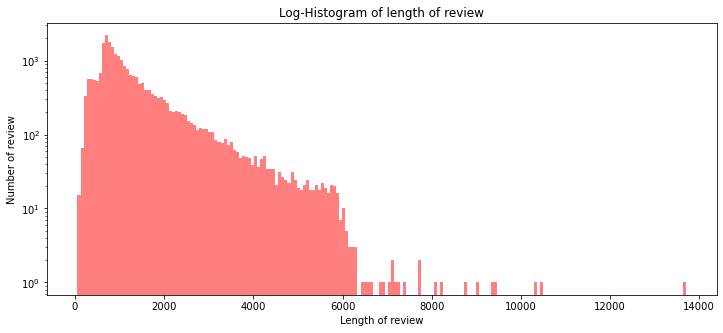

In [9]:
plt.figure(figsize=(12, 5))
plt.hist(train_length, bins=200, alpha=0.5, color = 'r', label='word')
plt.yscale('log', nonpositive='clip')

plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')

plt.ylabel('Number of review')

In [10]:
print('리뷰 길이 최대 값: {}'.format(np.max(train_length)))
print('리뷰 길이 최소 값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균 값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간 값: {}'.format(np.median(train_length)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 길이 제 1 사분위: {}'.format(np.percentile(train_length, 25)))
print('리뷰 길이 제 3 사분위: {}'.format(np.percentile(train_length, 75)))

리뷰 길이 최대 값: 13710
리뷰 길이 최소 값: 54
리뷰 길이 평균 값: 1329.71
리뷰 길이 표준편차: 1005.22
리뷰 길이 중간 값: 983.0
리뷰 길이 제 1 사분위: 705.0
리뷰 길이 제 3 사분위: 1619.0


{'whiskers': [<matplotlib.lines.Line2D at 0x135751d37c0>,
 'caps': [<matplotlib.lines.Line2D at 0x135751d3d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x135751d34f0>],
 'medians': [<matplotlib.lines.Line2D at 0x13578170340>],
 'fliers': [<matplotlib.lines.Line2D at 0x135781708e0>],
 'means': [<matplotlib.lines.Line2D at 0x13578170610>]}

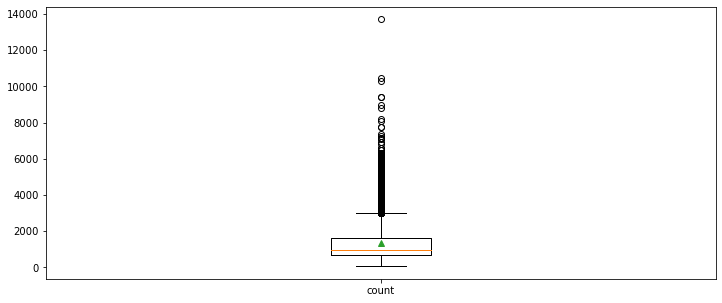

In [11]:
# showmeans=True : 평균표시
plt.figure(figsize=(12, 5))
plt.boxplot(train_length,
           labels=['count'],
           showmeans=True)

(-0.5, 799.5, 599.5, -0.5)

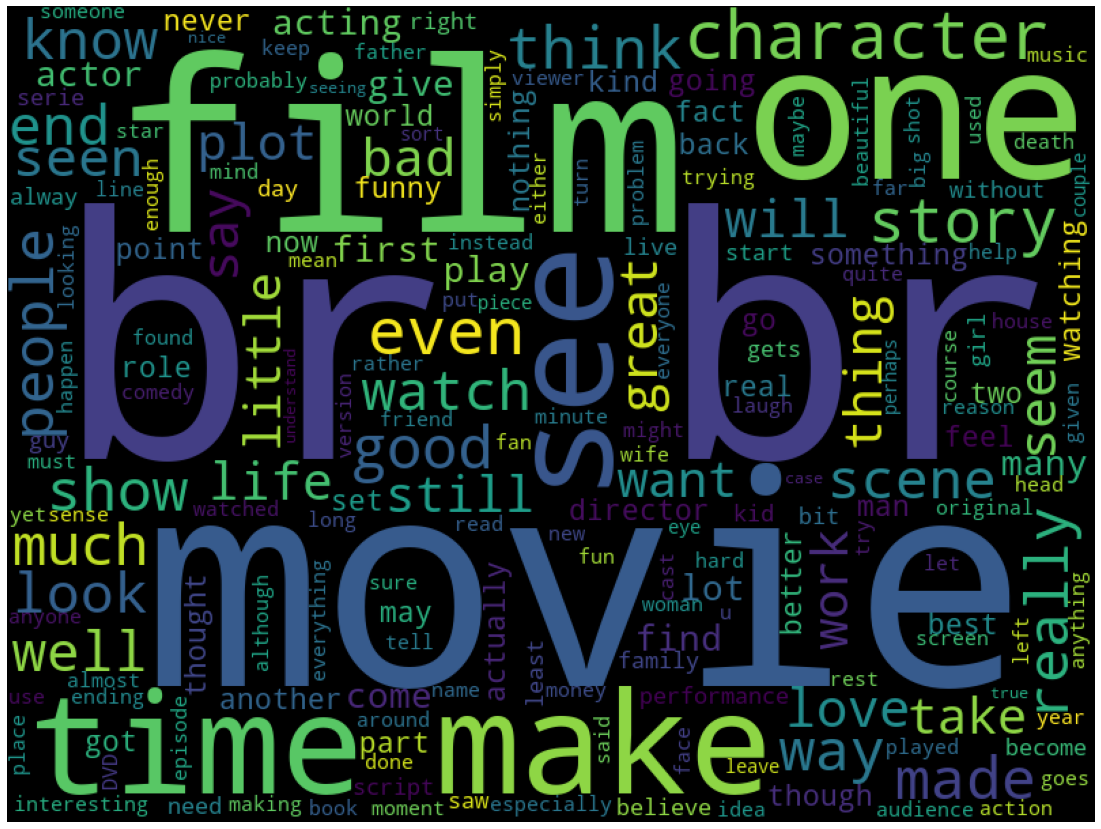

In [12]:
from wordcloud import WordCloud

cloud = WordCloud(width=800, height=600).generate(" ".join(train_data['review']))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.axis('off')

## 긍, 부정 데이터의 분포

<AxesSubplot:xlabel='sentiment', ylabel='count'>

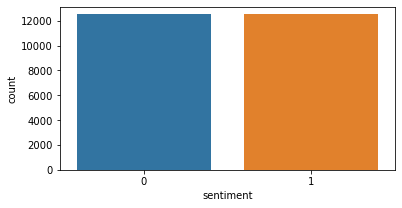

In [24]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_data['sentiment'])

In [14]:
print("긍정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[1]))
print("부정 리뷰 개수: {}".format(train_data['sentiment'].value_counts()[0]))

긍정 리뷰 개수: 12500
부정 리뷰 개수: 12500


### 각 리뷰의 단어 개수 분포

In [15]:
train_word_counts=train_data['review'].apply(lambda x:len(x.split(' ')))
train_word_counts

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64

Text(0, 0.5, 'Number of reviews')

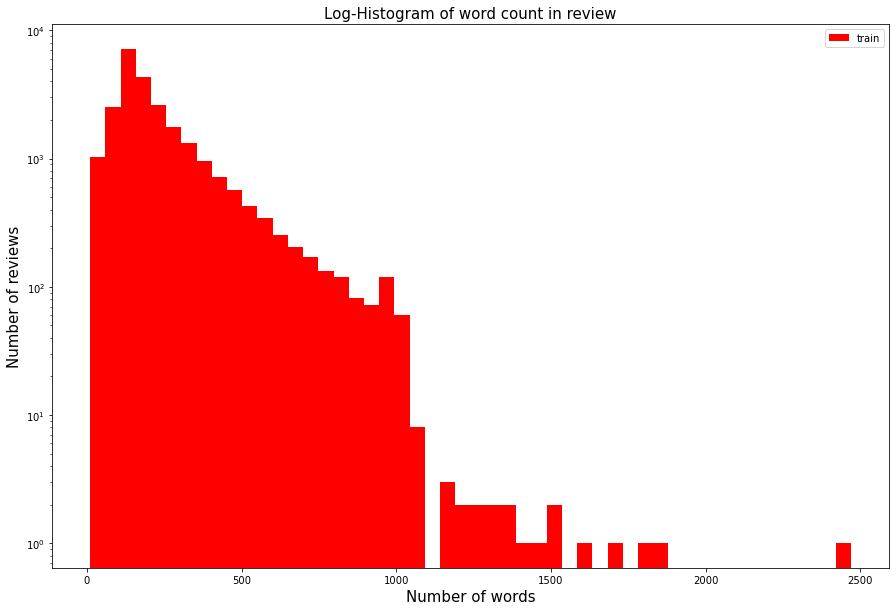

In [16]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [17]:
print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 2470
리뷰 단어 개수 최소 값: 10
리뷰 단어 개수 평균 값: 233.79
리뷰 단어 개수 표준편차: 173.74
리뷰 단어 개수 중간 값: 174.0
리뷰 단어 개수 제 1 사분위: 127.0
리뷰 단어 개수 제 3 사분위: 284.0


### 특수문자 및 대, 소문자 비율

In [25]:
qmarks=np.mean(train_data['review'].apply(lambda x: '?' in x))
print('물음표가 있는 질문: {:2f}%'.format(qmarks * 100))

fullstop=np.mean(train_data['review'].apply(lambda x: '.' in x))
print('마침표가 있는 질문: {:2f}%'.format(fullstop * 100))

capital_first = np.mean(train_data['review'].apply(lambda x: x[0].isupper()))
print('첫 글자가 대문자 인 질문: {:.2f}%'.format(capital_first * 100))

capitals = np.mean(train_data['review'].apply(lambda x: max([y.isupper() for y in x]))) # 대문자가 몇개
print('대문자가있는 질문: {:.2f}%'.format(capitals * 100))

numbers = np.mean(train_data['review'].apply(lambda x: max([y.isdigit() for y in x]))) # 숫자가 몇개
print('숫자가있는 질문: {:.2f}%'.format(numbers * 100))

#데이터 eda한 것

물음표가 있는 질문: 29.552000%
마침표가 있는 질문: 99.688000%
첫 글자가 대문자 인 질문: 0.00%
대문자가있는 질문: 99.59%
숫자가있는 질문: 56.66%


### 데이터 전처리

In [20]:
DATA_IN_PATH = './data_in/'
train_data = pd.read_csv( DATA_IN_PATH + 'labeledTrainData.tsv', header = 0, \
                         delimiter = '\t', quoting = 3)
print(train_data['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [21]:
review = train_data['review'][0]
review_text = BeautifulSoup(review, "html.parser").get_text() #get_text가 <>사라지게 하는 것 html 태그 제거
review_text = re.sub("[^a-zA-Z]", " ", review_text) #영어 문자를 제외한 나머지는 모두 공백처리
review_text

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

### 불용어 처리

In [27]:
stop_words = set(stopwords.words('english'))
review_text = review_text.lower()
words = review_text.split()
words = [w for w in words if not w in stop_words]
words

['stuff',
 'going',
 'moment',
 'mj',
 'started',
 'listening',
 'music',
 'watching',
 'odd',
 'documentary',
 'watched',
 'wiz',
 'watched',
 'moonwalker',
 'maybe',
 'want',
 'get',
 'certain',
 'insight',
 'guy',
 'thought',
 'really',
 'cool',
 'eighties',
 'maybe',
 'make',
 'mind',
 'whether',
 'guilty',
 'innocent',
 'moonwalker',
 'part',
 'biography',
 'part',
 'feature',
 'film',
 'remember',
 'going',
 'see',
 'cinema',
 'originally',
 'released',
 'subtle',
 'messages',
 'mj',
 'feeling',
 'towards',
 'press',
 'also',
 'obvious',
 'message',
 'drugs',
 'bad',
 'kay',
 'visually',
 'impressive',
 'course',
 'michael',
 'jackson',
 'unless',
 'remotely',
 'like',
 'mj',
 'anyway',
 'going',
 'hate',
 'find',
 'boring',
 'may',
 'call',
 'mj',
 'egotist',
 'consenting',
 'making',
 'movie',
 'mj',
 'fans',
 'would',
 'say',
 'made',
 'fans',
 'true',
 'really',
 'nice',
 'actual',
 'feature',
 'film',
 'bit',
 'finally',
 'starts',
 'minutes',
 'excluding',
 'smooth',
 'crim

In [28]:
print(words) #print해서 가로로 보기

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [29]:
clean_review=' '.join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [30]:
# 데이터 전처리 함수
def preprocessing(review, remove_stopwords = False):
    #1. HTML 태그 제거
    review_text = BeautifulSoup(review, "html.parser").get_text()
    
    #2. 영어가 아닌 특수문자들을 공백("")으로 바꾸기
    review_text=re.sub("[^a-zA-Z]", " ", review_text)
    
    #3. 대문자들을 소문자로 바꾸기, 공백으로 텍스트 나누기(리스트로 나옴)
    words = review_test.lower().split()
    
    #4. 불용어들을 제거
    if remove_stopwords:
        #영어 불용어 불러오기
        stops = set(stopwords.words("english"))
        
        #불용어가 제거된 새로운 리스트 생성
        words = [w for w in words if not w in stops]
        
        #단어리스트를 스트링으로 변환
        clean_review = ' '.join(words)
        
    #5 불용어 제거하지 않을 때
    clean_review = ' '.join(words)
    
    return clean_review #스트링된 단어를 리턴해서 넘겨주겠다.

### 저장

## exercise

In [22]:
import pandas as pd
df = pd.read_csv("a.csv", delimiter='\t')
df

,c0,c1,c2,c3
0,0,1,3,ddd
1,1,2,3,ooo
2,2,2,2,ddd


In [23]:
import pandas as pd
df = pd.read_csv("a.csv", delimiter='\t', quoting=3)
df

,c0,c1,c2,c3
0,0,1,3,"""ddd"""
1,1,2,3,"""ooo"""
2,2,2,2,"""ddd"""
